# Clasificación de pingüinos utilizando distintos métodos de machine learning.

In [202]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import random
import numpy as np
from sklearn.model_selection import train_test_split 
import joblib

## Mapa de distribución de los datos.

In [203]:
df = pd.read_csv("penguins_size.csv")
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [204]:
features = ['species','culmen_length_mm','culmen_depth_mm','flipper_length_mm', 'body_mass_g']
species =list(set(df['species']))
df['species'].replace(species,range(len(species)),inplace=True)
data = df[features].dropna()
data

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,39.1,18.7,181.0,3750.0
1,0,39.5,17.4,186.0,3800.0
2,0,40.3,18.0,195.0,3250.0
4,0,36.7,19.3,193.0,3450.0
5,0,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
338,2,47.2,13.7,214.0,4925.0
340,2,46.8,14.3,215.0,4850.0
341,2,50.4,15.7,222.0,5750.0
342,2,45.2,14.8,212.0,5200.0


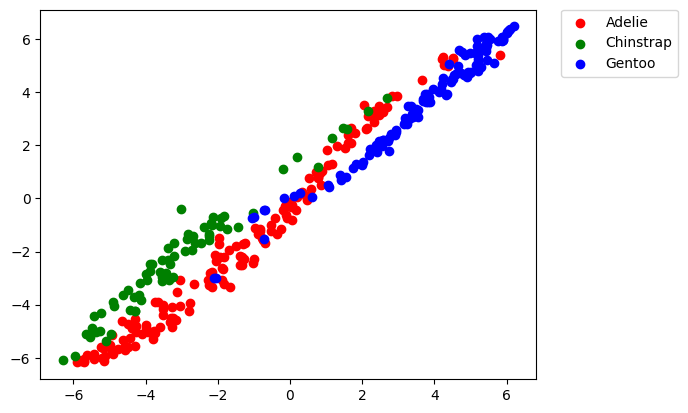

In [205]:
X_n = preprocessing.normalize(data.values)

r = data['species'] == 0
g = data['species'] == 1
b = data['species'] == 2

tsne = TSNE(
    n_components=2,
    init="random",
    random_state=30,
    perplexity=100,
    n_iter=300,
)
Y = tsne.fit_transform(X_n)
fig, ax = plt.subplots()

ax.scatter(Y[r,0],Y[r,1],c = 'r',label=species[0])
ax.scatter(Y[g,0],Y[g,1],c = 'g',label=species[1])
ax.scatter(Y[b,0],Y[b,1],c = 'b',label=species[2])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [206]:
df = pd.read_csv("penguins_size.csv")
df = df.dropna()
y = df["species"]
X = df.iloc[:,[2,3,4,5]]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=3)

### Método Redes Bayesianas

In [197]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

Redes Bayesianas: 0.9662921348314607

               precision    recall  f1-score   support

      Adelie       1.00      0.96      0.98        25
   Chinstrap       0.93      1.00      0.96        13
      Gentoo       1.00      1.00      1.00        29

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



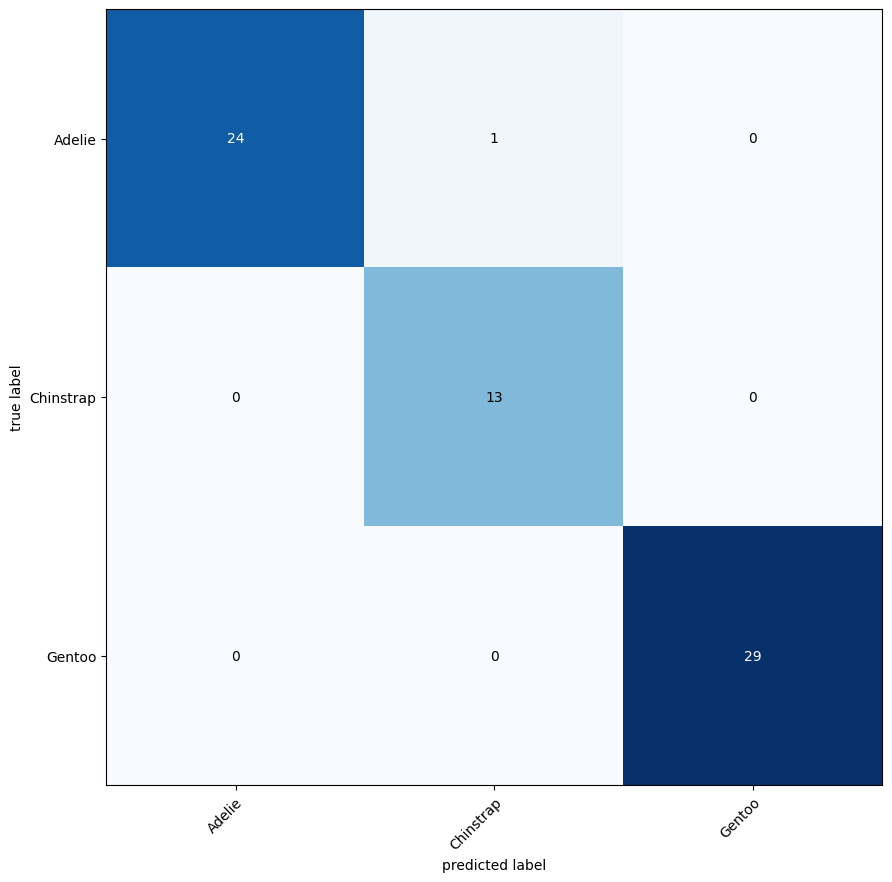

In [198]:
classifier_new = GaussianNB()
classifier_new.fit(X_train, y_train)
y_test_pred = classifier_new.predict(X_test)
accuracy = 100.0 * (y_test == y_test_pred_dtc).sum() / X_test.shape[0]
print('Redes Bayesianas: {}'.format(classifier_new.score(X_train, y_train)))
print('\n', classification_report(y_test, y_test_pred, target_names=targets))
targets = ['Adelie', 'Chinstrap', 'Gentoo']
matc = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=matc, figsize=(9,9), class_names=targets, show_normed=False)
plt.tight_layout()

### Método de Vecinos más Cercanos.

Vecinos más Cercanos: 0.8277153558052435

               precision    recall  f1-score   support

      Adelie       0.70      0.92      0.79        25
   Chinstrap       1.00      0.46      0.63        13
      Gentoo       0.89      0.86      0.88        29

    accuracy                           0.81        67
   macro avg       0.86      0.75      0.77        67
weighted avg       0.84      0.81      0.80        67



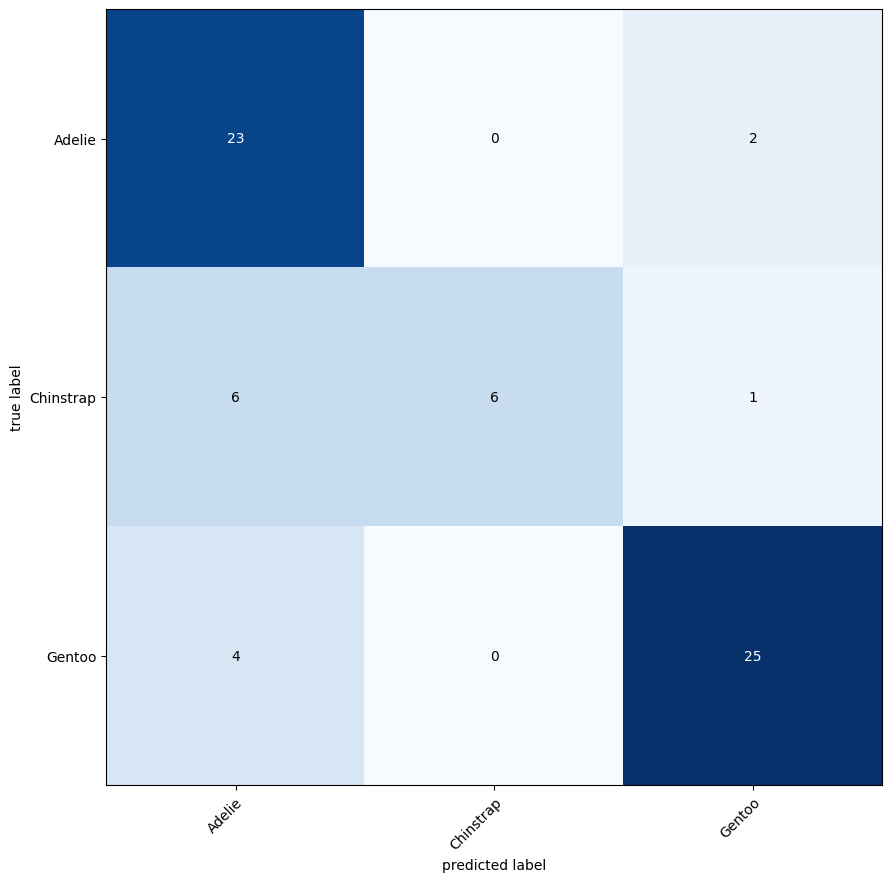

In [208]:
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train, y_train)
y_test_pred_kn= algoritmo.predict(X_test)
accuracy = 100.0 * (y_test == y_test_pred_kn).sum() / X_test.shape[0]
print('Vecinos más Cercanos: {}'.format(algoritmo.score(X_train, y_train)))
print('\n', classification_report(y_test, y_test_pred_kn, target_names=targets))
targets = ['Adelie', 'Chinstrap', 'Gentoo']
matc = confusion_matrix(y_test, y_test_pred_kn)
plot_confusion_matrix(conf_mat=matc, figsize=(9,9), class_names=targets, show_normed=False)
plt.tight_layout()

### Método de arboles de decisión

Arboles de decisión: 1.0

               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        25
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        29

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



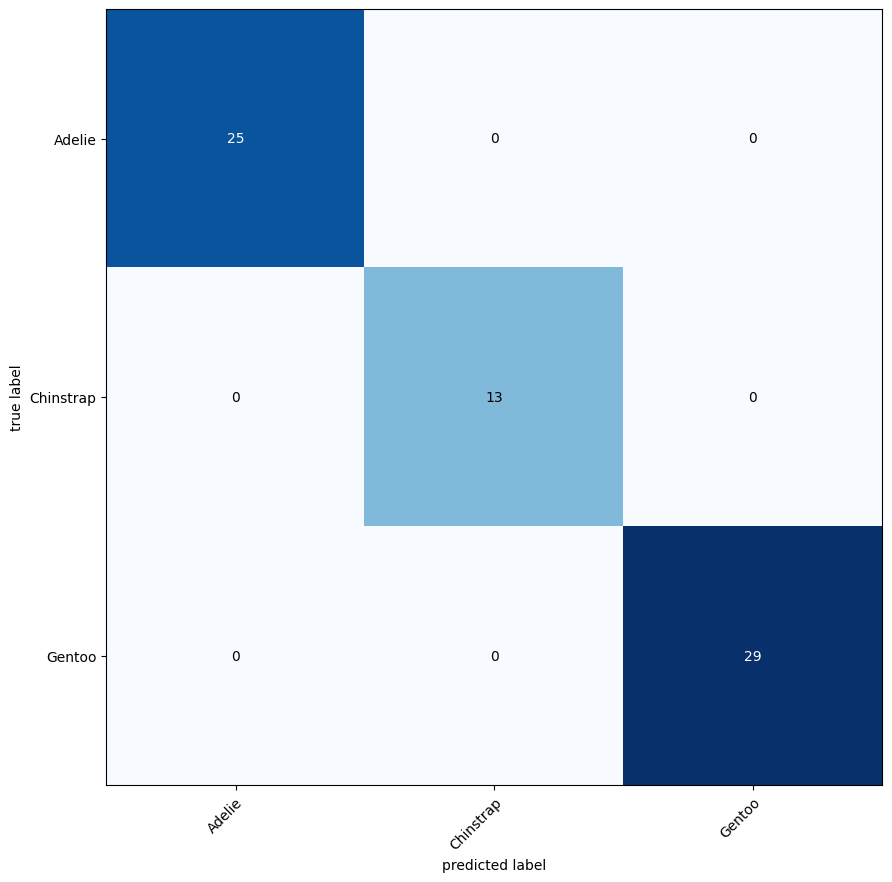

In [195]:
dtc= DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_test_pred_dtc = dtc.predict(X_test)
accuracy = 100.0 * (y_test == y_test_pred_dtc).sum() / X_test.shape[0]
print('Arboles de decisión: {}'.format(dtc.score(X_train, y_train)))
print('\n', classification_report(y_test, y_test_pred_dtc, target_names=targets))
targets = ['Adelie', 'Chinstrap', 'Gentoo']
matc = confusion_matrix(y_test, y_test_pred_dtc)
plot_confusion_matrix(conf_mat=matc, figsize=(9,9), class_names=targets, show_normed=False)
plt.tight_layout()

### Utilizando el modelo entrenado de redes bayesianas.

In [192]:
model_path = "clf.pkl"
model = joblib.load(model_path)

In [160]:
culmen_length_mm = random.uniform(5.5, 75.5)
culmen_depth_mm = random.uniform(5.5, 75.5)
flipper_length_mm = random.uniform(5.5, 75.5)
body_mass_g =random.uniform(2900, 4500)
X = pd.DataFrame(
    [[culmen_length_mm, culmen_depth_mm,flipper_length_mm,body_mass_g]], 
    columns = ["culmen_length_mm", "culmen_depth_mm","flipper_length_mm","body_mass_g"]
)
prediction = clf.predict(X)[0]
print(
        "culmen lenght:",culmen_length_mm,
        "culmen depth:",  culmen_depth_mm,
        "flipper lenght:", flipper_length_mm,
        "body mass:", body_mass_g,
        "What penguin am I?:", prediction,
)

culmen lenght: 24.770982004139235 culmen depth: 62.97639338193397 flipper lenght: 21.544965230110254 body mass: 3585.9251255920153 What penguin am I?: Adelie


In [165]:
culmen_length_mm = random.uniform(5.5, 75.5)
culmen_depth_mm = random.uniform(5.5, 75.5)
flipper_length_mm = random.uniform(5.5, 75.5)
body_mass_g =random.uniform(2900, 4500)
X = pd.DataFrame(
    [[culmen_length_mm, culmen_depth_mm,flipper_length_mm,body_mass_g]], 
    columns = ["culmen_length_mm", "culmen_depth_mm","flipper_length_mm","body_mass_g"]
)
prediction = clf.predict(X)[0]
print(
        "culmen lenght:",culmen_length_mm,
        "culmen depth:",  culmen_depth_mm,
        "flipper lenght:", flipper_length_mm,
        "body mass:", body_mass_g,
        "What penguin am I?:", prediction,
)

culmen lenght: 6.3134686340918185 culmen depth: 16.609853543291226 flipper lenght: 53.121499253229985 body mass: 3749.243023394749 What penguin am I?: Chinstrap
